In [58]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import os
import copy

In [2]:
#Set visual options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
PROJECT_PATH = os.getcwd()
TRAIN_PATH = PROJECT_PATH + "\\dataset\\train.csv"
TEST_PATH = PROJECT_PATH + "\\dataset\\test.csv"

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
def plot_hist(attribute="SalePrice", kde=True, bins=20, color="#A65CE1", figure_size=(10, 6), title: str = "", x_label: str="", y_label="Frequency"):
    plt.figure(figsize=figure_size)

    sns.histplot(data=df_train[attribute], kde=kde, color=color, bins=bins)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)

    # Enable grid lines for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Customize the appearance of the grid lines
    plt.gca().set_axisbelow(True)  # Ensure grid lines are behind the bars

    plt.show()

c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


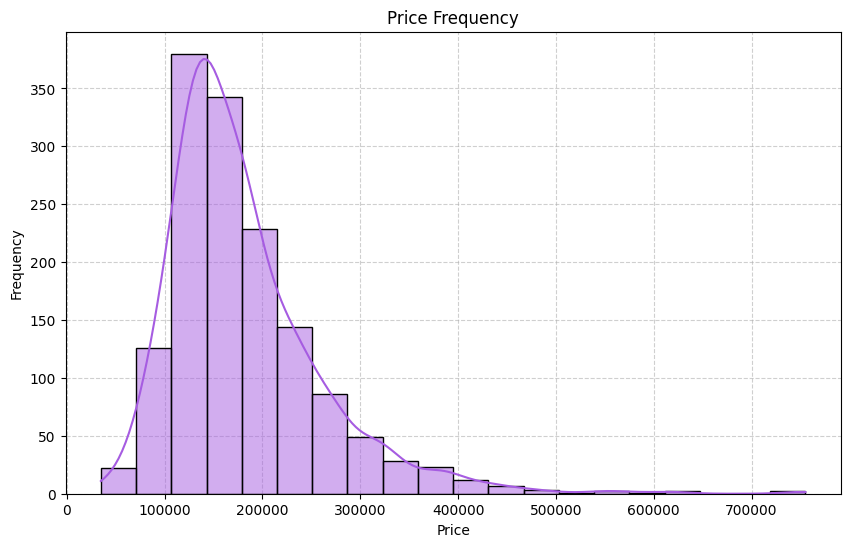

In [7]:
plot_hist(title="Price Frequency", x_label="Price")

In [8]:
series_train_null = df_train.isnull().sum()

In [9]:
type(series_train_null)

pandas.core.series.Series

In [10]:
series_train_null

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [11]:
df_train_null = pd.DataFrame({"Feature": series_train_null.index,
                              "Count": series_train_null.values})

In [48]:
df_train_null

,Feature,Count
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
5,Street,0
6,Alley,1369
7,LotShape,0
8,LandContour,0
9,Utilities,0


In [16]:
#Features with nan values
columns_to_impute = list(df_train_null[df_train_null["Count"] != 0]["Feature"])

In [21]:
columns_to_impute

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
df_train_null.drop(df_train_null[df_train_null.Count == 0].index, inplace=True)

c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


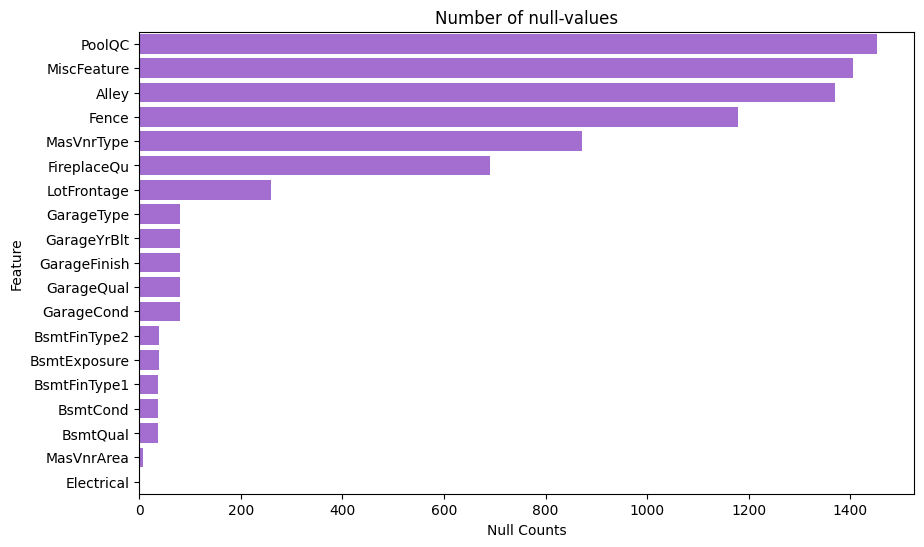

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df_train_null.sort_values(by="Count", ascending=False), x="Count", y="Feature", color="#A65CE1")

plt.title("Number of null-values")

plt.xlabel("Null Counts")

plt.ylabel("Feature")

plt.show()

In [19]:
#Setup Scaler and Encoder
scaler = MinMaxScaler()
encoder = ce.HashingEncoder(n_components=2, return_df=True)

In [20]:
df_train_encoded = encoder.fit_transform(df_train)
df_train_encoded.head(20)

c:\Users\azizc\anaconda3\envs\data_analysis\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)


,col_0,col_1,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,15,28,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,17,26,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,15,28,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,14,29,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,16,27,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,15,28,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,18,25,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,18,25,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,18,25,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,18,25,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [24]:
# df_train_filled_tmp = imputer.fit(df_train_encoded)
# df_train_encoded = imputer.transform(df_train_encoded)

df_train_imputed = copy.deepcopy(df_train_encoded)

In [38]:
cols_to_delete = []
for e in df_train_imputed.columns:
    if df_train_imputed[e].isnull().sum() != 0:
        cols_to_delete.append(e)

In [39]:
df_train_imputed = df_train_imputed.drop(cols_to_delete, axis=1)

In [43]:
df_train_imputed.columns

Index(['col_0', 'col_1', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [44]:
#split training set
X_train = df_train_imputed.drop('SalePrice', axis=1)
y_train = df_train_imputed['SalePrice']

In [45]:
X_train.head(10)

,col_0,col_1,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,15,28,1,60,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,17,26,2,20,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,15,28,3,60,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,14,29,4,70,60.000000,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,16,27,5,60,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
5,15,28,6,50,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009
6,18,25,7,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007
7,18,25,8,60,70.049958,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009
8,18,25,9,50,51.000000,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008
9,18,25,10,190,50.000000,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008


<Axes: title={'center': 'Correlation Matrix for Training Features'}>

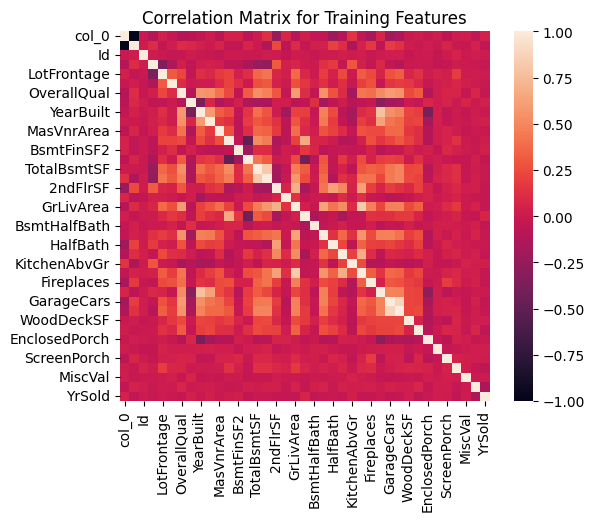

In [49]:
corrmatrix_train = X_train.corr()
plt.title("Correlation Matrix for Training Features")
sns.heatmap(corrmatrix_train, square=True)

In [54]:
X_train_rf = X_train.iloc[:round(len(X_train)*0.9)]
X_val_rf =  X_train.iloc[round(len(X_train)*0.9):]

y_train_rf = y_train.iloc[:round(len(X_train)*0.9)]
y_val_rf = y_train.iloc[round(len(X_train)*0.9):]

In [56]:
#Setup classifier
rf = RandomForestRegressor(n_estimators=500, random_state=42)

rf.fit(X=X_train_rf, y=y_train_rf)

RandomForestRegressor(n_estimators=500, random_state=42)

In [57]:
important_features = rf.feature_importances_
print(important_features)

[2.54722600e-03 2.67063698e-03 5.28040491e-03 2.34522368e-03
 9.40608856e-03 1.79202850e-02 5.86478075e-01 5.35408131e-03
 1.40301539e-02 1.06976254e-02 6.02059621e-03 3.10296335e-02
 1.04332788e-03 5.48117944e-03 4.02863695e-02 2.42041915e-02
 4.17628826e-02 8.05916425e-05 1.06262963e-01 1.08427147e-03
 4.42708368e-04 7.83294530e-03 9.65060642e-04 2.06094150e-03
 8.46998949e-04 8.27384641e-03 3.64887761e-03 5.84227843e-03
 2.05867536e-02 1.50371854e-02 5.10073478e-03 6.31531629e-03
 1.15636873e-03 2.69170301e-04 1.38004911e-03 4.00794883e-04
 1.01805830e-04 3.92823995e-03 1.82411703e-03]


In [67]:
list(X_train_rf.columns)

['col_0',
 'col_1',
 'Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

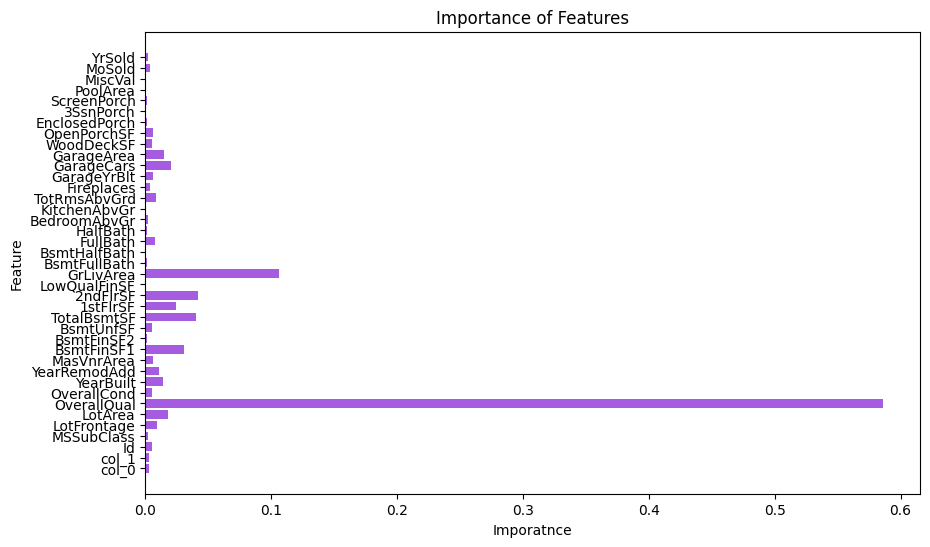

In [70]:
df_importance = pd.DataFrame(data={"Feature": list(X_train_rf.columns),
                                   "Importance": important_features})

plt.figure(figsize=(10, 6))
plt.barh(df_importance["Feature"], df_importance["Importance"], color="#A65CE1")
plt.xlabel("Imporatnce")
plt.ylabel("Feature")
plt.title("Importance of Features")

plt.show()


In [59]:
y_val_prediction = rf.predict(X_val_rf)

In [60]:
y_val_prediction

array([123452.764, 177756.248, 257079.536, 193924.514, 273260.648,
       115415.822, 154433.114,  77627.144, 222479.254,  80078.222,
       279124.642,  81902.742,  85347.9  , 127897.726, 196829.996,
       185229.884, 253194.508, 134825.454, 117171.416, 126509.62 ,
       132070.252, 170384.098, 137166.604,  82056.352, 226267.852,
       123488.006, 114470.804, 159087.556, 273047.558, 153448.744,
       182537.884,  91097.328, 249028.744, 280630.298, 242075.138,
       265683.536, 159795.176, 164654.668, 119613.358, 376883.428,
       233328.054, 201790.49 , 116205.082, 152520.4  , 172016.792,
       361870.272, 158507.71 , 243352.062, 138194.34 , 168618.79 ,
       154114.778, 199986.25 , 219352.192, 153307.54 , 141450.8  ,
       260702.926, 112333.802, 165919.324, 270366.566, 404445.876,
       246066.448, 245524.056, 105856.474, 152266.3  ,  98179.4  ,
       145017.154,  81861.438, 199284.66 , 163083.948, 152232.428,
       112561.216, 118502.944, 277979.102, 165629.588, 348087.

In [65]:
#Evaluate the model by calculating the error

#Mean Square Error (MSE)
mse = mean_squared_error(list(y_val_rf.values), y_val_prediction)

#R-Squared (R2)
r2 = r2_score(list(y_val_rf.values), y_val_prediction)

print(f"MSE == {mse: .2f}")
print(f"r2 == {r2: .2f}")

MSE ==  745716215.66
r2 ==  0.86
